In [1]:
#!/usr/bin/env python
import sys, os, os.path
import numpy as np
import pandas as pd
import json
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import ast
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

In [2]:
raw_behaviour = pd.read_csv(
    "/Users/mslokom/Documents/RecSys_News/MIND/mind_version1/MIND_Demo_Version1/valid/behaviors.tsv", 
    sep="\t",
    names=["impressionId" ,"userId","timestamp","click_history","impressions"])

print(f"The dataset consist of {len(raw_behaviour)} number of interactions.")


The dataset consist of 7538 number of interactions.


In [3]:
def parse_line(impid, impressions):
    labels = [int(part.split('-')[1]) for part in impressions.split()]
    return impid, labels

# Select relevant columns
truth_file = raw_behaviour [["impressionId" , "impressions"]]

# Iterate through selected rows
for index, row in truth_file.iterrows():
    impid, labels = parse_line(row["impressionId"], row["impressions"])
    if impid is not None and labels is not None:
        print(f"Impression ID: {impid}, Labels: {labels}")


Impression ID: 1, Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Impression ID: 2, Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Impression ID: 3, Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Impression ID: 4, Labels: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Impression ID: 5, Labels: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Impression ID: 6, Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Impression ID: 7, Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Impression ID: 8, Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

In [4]:
# Adjusted parse_line function
def parse_line(l):
    parts = l.strip().split('\t')
    if len(parts) != 2 or parts[0] == "impressionId":
        return None, None
    impid = parts[0]
    labels = [1 if impression.endswith("-1") else 0 for impression in parts[1].split()]
    return impid, labels

# Read the "impressionId" and "impressions" columns from the behaviors.tsv file
df = raw_behaviour [["impressionId" , "impressions"]]

print (df)
# Open a new truth.txt file for writing
with open("/Users/mslokom/Documents/RecSys_News/MIND/mind_version1/MIND_Demo_Version1/valid/truth.txt", "w") as truth_file:
    # Iterate through rows in the DataFrame
    for _, row in df.iterrows():
        # Extract impressionId and labels
        impid, labels = parse_line(f"{row['impressionId']}\t{row['impressions']}")
        print (impid, labels)
        if impid is not None and labels is not None:
            # Write to truth.txt in the desired format
            truth_file.write(f"{impid} {labels}\n")

      impressionId                                        impressions
0                1  N23699-0 N21291-0 N1901-0 N27292-0 N17443-0 N1...
1                2  N26916-0 N4641-0 N25522-0 N14893-0 N19035-0 N3...
2                3  N13528-0 N27689-0 N10879-0 N11662-0 N14409-0 N...
3                4  N20150-0 N1807-1 N26916-0 N28138-0 N9576-0 N19...
4                5  N21325-0 N5982-0 N19737-1 N9576-0 N20150-0 N25...
...            ...                                                ...
7533          7534  N26256-0 N28117-0 N2718-0 N16798-0 N27689-0 N6...
7534          7535  N26670-0 N12794-0 N3390-0 N17443-0 N27292-0 N2...
7535          7536  N17443-0 N16798-0 N24553-0 N26096-0 N15927-0 N...
7536          7537  N14850-0 N26647-0 N272-0 N22751-0 N21398-0 N26...
7537          7538  N3560-1 N3390-0 N13690-0 N4939-0 N25735-0 N552...

[7538 rows x 2 columns]
1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:

def dcg_score(y_true, y_score, k=10):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    gains = 2 ** y_true - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gains / discounts)
    

def ndcg_score(y_true, y_score, k=10):
    best = dcg_score(y_true, y_true, k)
    actual = dcg_score(y_true, y_score, k)
    return actual / best


def ctr_score(y_true, y_score, k=10):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    return np.mean(y_true)

def mrr_score(y_true, y_score):
    order = np.argsort(y_score)[::-1]
    # print ("order y_score")
    # print (y_score)
    y_true = np.take(y_true, order)
    # print ("order y_true")
    # print (y_true)
    rr_score = y_true / (np.arange(len(y_true)) + 1)
    # print (rr_score)
    return np.sum(rr_score) / np.sum(y_true)

# def parse_line(l):
#     impid, ranks = l.strip('\n').split()
#     ranks = json.loads(ranks)
#     return impid, ranks


def parse_line(l):
    parts = l.strip().split(' ')
    
    if len(parts) < 2 or not parts[0].isdigit():
        raise ValueError(f"Error parsing line: {l.strip()}")

    impid = parts[0]
    try:
        ranks = ast.literal_eval(' '.join(parts[1:]))
        ranks = [int(rank) for rank in ranks]
    except (ValueError, SyntaxError):
        raise ValueError(f"Error parsing line: {l.strip()}")
    
    return impid, ranks



In [6]:

import csv
def scoring(truth_f, sub_f, output_csv_path):
    aucs = []
    mrrs = []
    ndcg5s = []
    ndcg10s = []
    ctr5s = []
    ctr10s = []
    ils_values = []
    item_coverage_values = []
    
    results = []  # Store results for each impressionId
    
    line_index = 1
    for lt in truth_f:
        print(lt)
        ls = sub_f.readline()
        print(ls)
        
        impid, labels = parse_line(lt)        
        # ignore masked impressions
        if labels == []:
            continue 
        
        if ls == '':
            # empty line: filled with 0 ranks
            sub_impid = impid
            sub_ranks = [1] * len(labels)
        else:
            try:
                sub_impid, sub_ranks = parse_line(ls)
            except:
                raise ValueError("line-{}: Invalid Input Format!".format(line_index))       

        # print(f"impid: {impid}, labels: {labels}")
        # print(f"sub_impid: {sub_impid}, sub_ranks: {sub_ranks}")
        
        if sub_impid != impid:
            raise ValueError("line-{}: Inconsistent Impression Id {} and {}".format(
                line_index,
                sub_impid,
                impid
            ))        
        
        lt_len = float(len(labels))
        
        y_true = np.array(labels, dtype='float32')
        y_score = [1 / rank for rank in sub_ranks]
        print (y_true, y_score)
            
        auc = roc_auc_score(y_true, y_score)
        mrr = mrr_score(y_true, y_score)
        ndcg5 = ndcg_score(y_true, y_score, 5)
        ndcg10 = ndcg_score(y_true, y_score, 10)
        ctr5 = ctr_score (y_true, y_score, 5)
        ctr10 = ctr_score (y_true, y_score, 10)
        ils = intra_list_similarity(y_true, y_score)
        item_coverage = calculate_item_coverage({sub_impid: sub_ranks}, 10)  # Adjust the cutoff as needed
        
        aucs.append(auc)
        mrrs.append(mrr)
        ndcg5s.append(ndcg5)
        ndcg10s.append(ndcg10)
        ctr5s.append(ctr5)
        ctr10s.append(ctr10)
        ils_values.append(ils)
        item_coverage_values.append(item_coverage)
        
        # Store results for each impressionId
        result_entry = {
            'impressionId': sub_impid,
            'auc': auc,
            'mrr': mrr,
            'ndcg5': ndcg5,
            'ndcg10': ndcg10,
            'ctr5': ctr5,
            'ctr10': ctr10,
            'ils': ils,
            'item_coverage': item_coverage
        }
        results.append(result_entry)
        
        line_index += 1

    # Calculate mean values for each metric
    mean_auc = np.mean(aucs)
    mean_mrr = np.mean(mrrs)
    mean_ndcg5 = np.mean(ndcg5s)
    mean_ndcg10 = np.mean(ndcg10s)
    mean_ctr5 = np.mean(ctr5s)
    mean_ctr10 = np.mean(ctr10s)
    mean_ils = np.mean(ils_values)
    mean_item_coverage = np.mean(item_coverage_values)

    # Save results to CSV
    save_results_to_csv(results, output_csv_path)

    return mean_auc, mean_mrr, mean_ndcg5, mean_ndcg10, mean_ctr5, mean_ctr10, mean_ils, mean_item_coverage

def save_results_to_csv(results, csv_path):
    # Save results to CSV file
    fieldnames = results[0].keys()
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(results)
        
def intra_list_similarity(y_true, y_score):
    # Calculate Intra-List Similarity (ILS)
    # You can implement your own ILS calculation or use a library
    # For example, you might want to calculate the cosine similarity between items in the list.
    # The below example assumes you have implemented the ILS function.
    # Replace this with your actual ILS calculation.
    return calculate_ils(y_true, y_score)


def calculate_item_coverage(items, total_items):
    unique_items = set(item for sublist in items for item in sublist)
    coverage = len(unique_items) / total_items
    return coverage

def calculate_ils(y_true, y_score):

    recommended_indices = np.nonzero(y_score)[0]
    if len(recommended_indices) <= 1:
        return 0.0  # Handling the case when there's only one or zero recommended items

    recommended_vectors = np.zeros(len(y_true))
    recommended_vectors[recommended_indices] = 1
    cosine_similarity = np.dot(y_true, recommended_vectors) / (np.linalg.norm(y_true) * np.linalg.norm(recommended_vectors))

    return cosine_similarity



In [7]:
def save_results_to_csv(results, csv_path):
    # Save results to CSV file
    fieldnames = results[0].keys()
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(results)

if __name__ == '__main__':
    total_items = 8667
    input_dir = sys.argv[1]
    output_dir = "/Users/mslokom/Documents/RecSys_News/MIND/mind_version1/MIND_Demo_Version1/results"

    output_filename = "/Users/mslokom/Documents/RecSys_News/jobs_server/LSTUR/lstur_results/scores-LSTUR_predictions-prediction_1000_users_epochs50_50%_Add.txt"
    output_file = open(output_filename, 'w')

    output_csv_filename = "/Users/mslokom/Documents/RecSys_News/jobs_server/LSTUR/lstur_results/results-LSTUR_predictions-prediction_1000_users_epochs50_50%_Add.csv"
    
    truth_file = open("/Users/mslokom/Documents/RecSys_News/MIND/mind_version1/MIND_Demo_Version1/valid/truth.txt", 'r')
    submission_answer_file = open("/Users/mslokom/Documents/RecSys_News/jobs_server/LSTUR/LSTUR_predictions/res_50%_Add-1000Users/prediction_1000_users_epochs50_50%_Add.txt", 'r')
    
    auc, mrr, ndcg, ndcg10, ctr5, ctr10, ils, coverage = scoring(truth_file, submission_answer_file, output_csv_filename)
    
    output_file.write("AUC:{:.4f}\nMRR:{:.4f}\nnDCG@5:{:.4f}\nnDCG@10:{:.4f}\nctr5:{:.4f}\nctr10:{:.4f}\nils:{:.4f}\ncoverage:{:.4f}".format(auc, mrr, ndcg, ndcg10, ctr5, ctr10, ils, coverage))
    
    output_file.close()

In [55]:
df_news = pd.read_csv(
    "/Users/mslokom/Documents/RecSys_News/MIND/mind_version1/MIND_Demo_Version1/valid/behaviors.tsv", 
    sep="\t",
    names=["impressionId", "userId","timestamp","click_history","impressions"])

df_news = df_news [["impressionId", "impressions"]]
df_news.head (5)


,impressionId,impressions
0,1,N23699-0 N21291-0 N1901-0 N27292-0 N17443-0 N1...
1,2,N26916-0 N4641-0 N25522-0 N14893-0 N19035-0 N3...
2,3,N13528-0 N27689-0 N10879-0 N11662-0 N14409-0 N...
3,4,N20150-0 N1807-1 N26916-0 N28138-0 N9576-0 N19...
4,5,N21325-0 N5982-0 N19737-1 N9576-0 N20150-0 N25...


In [56]:
df_news['impressions'] = df_news['impressions'].apply(lambda x: [item.split('-')[0] for item in x.split()])
df_news.head (5)

,impressionId,impressions
0,1,"[N23699, N21291, N1901, N27292, N17443, N18282..."
1,2,"[N26916, N4641, N25522, N14893, N19035, N3877,..."
2,3,"[N13528, N27689, N10879, N11662, N14409, N6849..."
3,4,"[N20150, N1807, N26916, N28138, N9576, N19737,..."
4,5,"[N21325, N5982, N19737, N9576, N20150, N25701,..."


In [67]:
def process_prediction_file(predictions_file_path, df_news):
    # Create lists to store data
    impressionIds = []
    impression_column_df_news = []
    impression_listOrdered = []
    impression_converted_articleID = []

    # Read lines from the predictions file
    with open(predictions_file_path, "r") as predictions_file:
        # Iterate through lines in the file
        for line in predictions_file:
            # Split the line into impressionId and impressions
            impressionId, impressions_str = line.strip().split(' ', 1)

            # Convert impressions to a list of integers
            impressions = list(map(int, impressions_str[1:-1].split(',')))

            # Convert impressionId to integer for proper indexing
            impressionId = int(impressionId)

            # Map indices to articleIDs using df_news
            articleIDs = [df_news.at[impressionId - 1, 'impressions'][i - 1].split('-')[0] if 1 <= i <= len(df_news.at[impressionId - 1, 'impressions']) else None for i in impressions]

            # Append data to lists
            impressionIds.append(impressionId)
            impression_column_df_news.append(df_news.at[impressionId - 1, 'impressions'])
            impression_listOrdered.append(impressions)
            impression_converted_articleID.append(articleIDs)

    # Create the DataFrame
    data = pd.DataFrame({
        'impressionId': impressionIds,
        'impression_column_df_news': impression_column_df_news,
        'impression_listOrdered': impression_listOrdered,
        'impression_converted_articleID': impression_converted_articleID
    })

    return data

predictions_file_paths = [
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/original_1000users_behavior.tsv_5/prediction.txt", "data_1"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/Greedy/preproc_Add_0.01_9369Items_1000Users_behavior.tsv_1/prediction.txt", "data_2"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/Greedy/preproc_Add_0.02_9369Items_1000Users_behavior.tsv_1/prediction.txt", "data_3"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/Greedy/preproc_Add_0.05_9369Items_1000Users_behavior.tsv_3/prediction.txt", "data_4"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/Greedy/preproc_Add_0.1_9369Items_1000Users_behavior.tsv_5/prediction.txt", "data_5"),
    # ("/Users/mslokom/Documents/RecSys_News/jobs_server/LSTUR/LSTUR_predictions/res_50%_Add-1000Users/prediction_1000_users_epochs50_50%_Add.txt", "data_6"),
    # Add more file paths as needed
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/original_1000users_behavior.tsv_5/prediction.txt", "data_1"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/Greedy/preproc_Obf_0.01_9369Items_1000Users_behavior.tsv_1/prediction.txt", "data_2"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/Greedy/preproc_Obf_0.02_9369Items_1000Users_behavior.tsv_5/prediction.txt", "data_3"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/Greedy/preproc_Obf_0.05_9369Items_1000Users_behavior.tsv_1/prediction.txt", "data_4"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NRMS/Greedy/preproc_Obf_0.1_9369Items_1000Users_behavior.tsv_4/prediction.txt", "data_5"),

    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/original_1000users_behavior.tsv/prediction.txt", "data_1"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/Greedy/preproc_Add_0.01_9369Items_1000Users_behavior.tsv/prediction.txt", "data_2"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/Greedy/preproc_Add_0.02_9369Items_1000Users_behavior.tsv/prediction.txt", "data_3"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/Greedy/preproc_Add_0.05_9369Items_1000Users_behavior.tsv/prediction.txt", "data_4"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/Greedy/preproc_Add_0.1_9369Items_1000Users_behavior.tsv/prediction.txt", "data_5"),

    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/original_1000users_behavior.tsv/prediction.txt", "data_1"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/Greedy/preproc_Obf_0.01_9369Items_1000Users_behavior.tsv/prediction.txt", "data_2"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/Greedy/preproc_Obf_0.02_9369Items_1000Users_behavior.tsv/prediction.txt", "data_3"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/Greedy/preproc_Obf_0.05_9369Items_1000Users_behavior.tsv/prediction.txt", "data_4"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/NPA/Greedy/preproc_Obf_0.1_9369Items_1000Users_behavior.tsv/prediction.txt", "data_5"),

    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/original_1000users_behavior.tsv_4/prediction.txt", "data_1"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/Greedy/preproc_Add_0.01_9369Items_1000Users_behavior.tsv_4/prediction.txt", "data_2"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/Greedy/preproc_Add_0.02_9369Items_1000Users_behavior.tsv_2/prediction.txt", "data_3"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/Greedy/preproc_Add_0.05_9369Items_1000Users_behavior.tsv_2/prediction.txt", "data_4"),
    # ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/Greedy/preproc_Add_0.1_9369Items_1000Users_behavior.tsv_4/prediction.txt", "data_5"),

    ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/original_1000users_behavior.tsv_4/prediction.txt", "data_1"),
    ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/Greedy/preproc_Obf_0.01_9369Items_1000Users_behavior.tsv_3/prediction.txt", "data_2"),
    ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/Greedy/preproc_Obf_0.02_9369Items_1000Users_behavior.tsv_2/prediction.txt", "data_3"),
    ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/Greedy/preproc_Obf_0.05_9369Items_1000Users_behavior.tsv_2/prediction.txt", "data_4"),
    ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/Greedy/preproc_Obf_0.1_9369Items_1000Users_behavior.tsv_2/prediction.txt", "data_5"),

]

# Create a dictionary to store datasets
datasets = {}

# Process each prediction file and store the data with a specified name
for file_path, data_name in predictions_file_paths:
    data = process_prediction_file(file_path, df_news)
    datasets[data_name] = data

data_0 = df_news
data_1 = datasets['data_1']
data_2 = datasets['data_2']
data_3 = datasets['data_3']
data_4 = datasets['data_4']
data_5 = datasets['data_5']
# data_6 = datasets['data_6']


In [68]:
# Explode the 'impression_column_df_news' and 'impression_converted_articleID' columns
ground_truth = data_0 [["impressionId", "impressions"]]
ground_truth = ground_truth.explode('impressions')
ground_truth = ground_truth.rename(columns={'impressions': 'itemid'})#, 'impressionId': 'user'})
ground_truth.head (5)


,impressionId,itemid
0,1,N23699
0,1,N21291
0,1,N1901
0,1,N27292
0,1,N17443


In [69]:
predictions_org = data_1 [["impressionId", "impression_converted_articleID"]]
predictions_org = predictions_org.explode('impression_converted_articleID')
predictions_org = predictions_org.rename(columns={'impression_converted_articleID': 'itemid'}) #, 'impressionId': 'user'})
predictions_org.head (5)

,impressionId,itemid
0,1,N21291
0,1,N17443
0,1,N26916
0,1,N14623
0,1,N9181


In [70]:
predictions_1perc = data_2 [["impressionId", "impression_converted_articleID"]]
predictions_1perc = predictions_1perc.explode('impression_converted_articleID')
predictions_1perc = predictions_1perc.rename(columns={'impression_converted_articleID': 'itemid'}) #, 'impressionId': 'user'})
# predictions_1perc

predictions_2perc = data_3 [["impressionId", "impression_converted_articleID"]]
predictions_2perc = predictions_2perc.explode('impression_converted_articleID')
predictions_2perc = predictions_2perc.rename(columns={'impression_converted_articleID': 'itemid'}) #, 'impressionId': 'user'})

predictions_5perc = data_4 [["impressionId", "impression_converted_articleID"]]
predictions_5perc = predictions_5perc.explode('impression_converted_articleID')
predictions_5perc = predictions_5perc.rename(columns={'impression_converted_articleID': 'itemid'}) #, 'impressionId': 'user'})

predictions_10perc = data_5 [["impressionId", "impression_converted_articleID"]]
predictions_10perc = predictions_10perc.explode('impression_converted_articleID')
predictions_10perc = predictions_10perc.rename(columns={'impression_converted_articleID': 'itemid'}) #, 'impressionId': 'user'})

# predictions_50perc = data_6 [["impressionId", "impression_converted_articleID"]]
# predictions_50perc = predictions_50perc.explode('impression_converted_articleID')
# predictions_50perc = predictions_50perc.rename(columns={'impression_converted_articleID': 'itemid'}) #, 'impressionId': 'user'})
# predictions_50perc.head (5)

In [71]:
news = pd.read_csv(
    "/Users/mslokom/Documents/RecSys_News/MIND/mind_version1/MIND_Demo_Version1/valid/news.tsv", 
    sep="\t",
    names=["itemid","category","subcategory","title","abstract","url","title_entities","abstract_entities"])
news.head(2)

,itemid,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N3112,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://www.msn.com/en-us/lifestyle/lifestyler...,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N10399,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://www.msn.com/en-us/news/world/the-cost-...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [72]:
ground_truth_F = pd.merge(ground_truth, news[['itemid', 'category']], on='itemid', how='left')
predictions_F_org = pd.merge(predictions_org, news[['itemid', 'category']], on='itemid', how='left')
predictions_F_1perc = pd.merge(predictions_1perc, news[['itemid', 'category']], on='itemid', how='left')
predictions_F_2perc = pd.merge(predictions_2perc, news[['itemid', 'category']], on='itemid', how='left')
predictions_F_5perc = pd.merge(predictions_5perc, news[['itemid', 'category']], on='itemid', how='left')
predictions_F_10perc = pd.merge(predictions_10perc, news[['itemid', 'category']], on='itemid', how='left')
# predictions_F_50perc = pd.merge(predictions_50perc, news[['itemid', 'category']], on='itemid', how='left')

# Sort the DataFrame by impressionId and itemid
# ground_truth_F.sort_values(['impressionId', 'itemid'], inplace=True)
# predictions_F_org.sort_values(['impressionId', 'itemid'], inplace=True)
# predictions_F_1perc.sort_values(['impressionId', 'itemid'], inplace=True)
# predictions_F_2perc.sort_values(['impressionId', 'itemid'], inplace=True)
# predictions_F_5perc.sort_values(['impressionId', 'itemid'], inplace=True)
# predictions_F_10perc.sort_values(['impressionId', 'itemid'], inplace=True)
# predictions_F_50perc.sort_values(['impressionId', 'itemid'], inplace=True)
# Add the 'rank' column based on the grouped impressionId
ground_truth_F['rank'] = ground_truth_F.groupby('impressionId').cumcount() + 1
predictions_F_org['rank'] = predictions_F_org.groupby('impressionId').cumcount() + 1
predictions_F_1perc['rank'] = predictions_F_1perc.groupby('impressionId').cumcount() + 1
predictions_F_2perc['rank'] = predictions_F_2perc.groupby('impressionId').cumcount() + 1
predictions_F_5perc['rank'] = predictions_F_5perc.groupby('impressionId').cumcount() + 1
predictions_F_10perc['rank'] = predictions_F_10perc.groupby('impressionId').cumcount() + 1
# predictions_F_50perc['rank'] = predictions_F_50perc.groupby('impressionId').cumcount() + 1
ground_truth_F.head (5)

,impressionId,itemid,category,rank
0,1,N23699,news,1
1,1,N21291,news,2
2,1,N1901,tv,3
3,1,N27292,news,4
4,1,N17443,entertainment,5


In [73]:
print (news.category.value_counts())
print (len (news.category.unique()))
print (news.category.unique())

news             5922
sports           3962
finance          1327
lifestyle        1160
foodanddrink     1138
health            973
travel            791
autos             723
video             591
tv                585
weather           471
music             377
movies            359
entertainment     338
kids                4
middleeast          2
Name: category, dtype: int64
16
['lifestyle' 'news' 'health' 'weather' 'entertainment' 'autos' 'travel'
 'sports' 'tv' 'foodanddrink' 'movies' 'finance' 'video' 'music'
 'middleeast' 'kids']


In [75]:
def fair_dcg(predictions, k, relevant_categories):
    data = list(zip(predictions['rank'], predictions['category']))

    sorted_data = sorted(data, key=lambda x: x[0])

    fair_dcg_score = 0.0
    total_weight = 0.0
    unique_categories = set()

    for i, (rank, category) in enumerate(sorted_data, 1):
        if i > k:
            break  # Stop calculating after reaching the top k

        gain = 2 ** 1 - 1 if category in relevant_categories else 2 ** 0 - 1  # Adjust based on your relevance criteria
        discount = np.log2(i + 1)

        # Calculate weight
        weight = 1.0

        # Update total weight
        total_weight += weight

        # Update unique categories
        unique_categories.add(category)
        # print (unique_categories)

        fair_dcg_score += (gain / discount) * weight

    # Normalize by the ideal DCG
    ideal_labels = [1] + [0] * (k - 1)  # Ideal ranking for binary relevance
    ideal_dcg = sum((2 ** label - 1) / np.log2(i + 1) for i, label in enumerate(ideal_labels, 1) if i <= k)
    fair_dcg_score /= ideal_dcg

    # Normalize by the total weight
    fair_dcg_score /= len(unique_categories) / total_weight

    return fair_dcg_score
 
# relevant_categories = ['middleeast','kids', 'weather', 'video', 'music', 'autos', 'movies', 'entertainment', 'tv', 'health', 'travel']
# relevant_categories = ['lifestyle', 'news', 'health', 'weather', 'entertainment', 'autos', 'travel',
#                     'sports', 'tv', 'foodanddrink', 'movies', 'finance', 'video', 'music', 'middleeast', 'kids']
relevant_categories = ['kids', 'weather', 'video', 'music', 'autos', 'movies', 'middleeast', 'northamerica']

datasets = [ground_truth_F, predictions_F_org, predictions_F_1perc, predictions_F_2perc, predictions_F_5perc, predictions_F_10perc]#, predictions_F_50perc]
dataset_names = ['Ground Truth', 'Org recs', 'Recs 1%', 'Recs 2%', 'Recs 5%', 'Recs 10%']#, 'Predictions 50%']

results = []

for i, dataset in enumerate(datasets):
    print (i, dataset)
    for k in range(1, 101):  # Adjust the range based on your needs
        print (k)
        score = fair_dcg(dataset, k, relevant_categories)
        results.append({'Dataset': dataset_names[i], 'k': k, 'fair_ndcg_score': score})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/fair_ndcg_results-lstur_2step.csv', index=False)


0         impressionId  itemid       category  rank
0                  1  N23699           news     1
1                  1  N21291           news     2
2                  1   N1901             tv     3
3                  1  N27292           news     4
4                  1  N17443  entertainment     5
...              ...     ...            ...   ...
283937          7538   N4939           news     4
283938          7538  N25735             tv     5
283939          7538   N5520      lifestyle     6
283940          7538  N19653           news     7
283941          7538   N8620           news     8

[283942 rows x 4 columns]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1         impressionId  itemid       category  rank
0                  1  N2129

In [76]:
results_df_norm = pd.read_csv ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/fair_ndcg_results-lstur_2step.csv")
results_df_norm ["normalized"] = results_df_norm ["fair_ndcg_score"] / max (results_df_norm ["fair_ndcg_score"])#.max()
results_df_norm.to_csv ("MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/normalized_fair_ndcg_results-lstur_2step.csv", index= False) 
results_df_norm

,Dataset,k,fair_ndcg_score,normalized
0,Ground Truth,1,0.000000,0.00
1,Ground Truth,2,0.000000,0.00
2,Ground Truth,3,0.000000,0.00
3,Ground Truth,4,0.000000,0.00
4,Ground Truth,5,0.000000,0.00
...,...,...,...,...
595,Recs 10%,96,32.242639,0.96
596,Recs 10%,97,32.578500,0.97
597,Recs 10%,98,32.914361,0.98
598,Recs 10%,99,33.250222,0.99


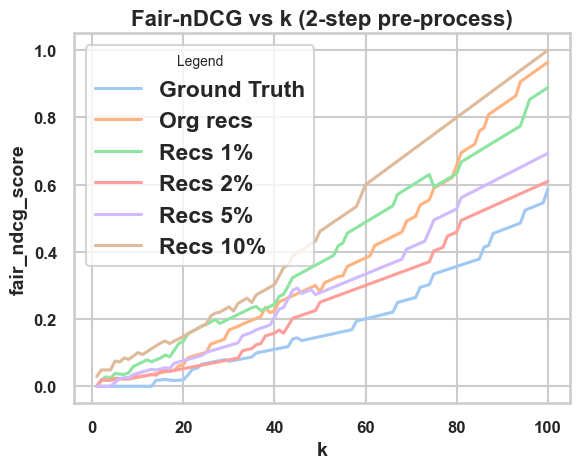

In [77]:
import seaborn as sns  # Import seaborn for color palettes

# Set the seaborn style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("talk")

# Plot line plots for each dataset with a different color palette
datasets = results_df_norm['Dataset'].unique()

# Choose a color palette from seaborn, e.g., "pastel"
colors = sns.color_palette("pastel", len(datasets))

for i, dataset in enumerate(datasets):
    dataset_df = results_df_norm[results_df_norm['Dataset'] == dataset]
    plt.plot(dataset_df['k'], dataset_df['normalized'], label=dataset, color=colors[i])

# Set labels and title with increased text size and bold text
plt.xlabel('k', fontsize=14, fontweight='bold')
plt.ylabel('fair_ndcg_score', fontsize=14, fontweight='bold')
plt.title('Fair-nDCG vs k (2-step pre-process)', fontsize=16, fontweight='bold')

# Increase the size of tick labels and bolden them
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Add legend with increased text size and bold text
plt.legend(fontsize=10, title='Legend', title_fontsize=10, prop={'weight': 'bold'})

# Save the plot to a PDF file
pdf_filename = 'MIND/mind_version1/MIND_Demo_Version1/results/calibration/predictions_version_WSDM/LSTUR/fair_ndcg_plot-lstur-2-step.pdf'
plt.savefig(pdf_filename, bbox_inches='tight')

# Show the plot
plt.show()
